In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [2]:
target.unique()

array(['donated', 'not donated'], dtype=object)

In [4]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [10]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(data, target)
dummy_clf.predict(data)
dummy_clf.score(data, target)

0.7620320855614974

In [13]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dummy_clf, data,target, cv=3,scoring=('balanced_accuracy'),return_train_score=True)
scores

{'fit_time': array([0.00219822, 0.00110579, 0.00117373]),
 'score_time': array([0.00264311, 0.0016911 , 0.00161576]),
 'test_score': array([0.5, 0.5, 0.5]),
 'train_score': array([0.5, 0.5, 0.5])}

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(KNeighborsClassifier(n_neighbors=1))
cross_validate(model, data,target, cv=10,scoring=('balanced_accuracy'),return_train_score=True)

{'fit_time': array([0.00818086, 0.00516915, 0.00344133, 0.0038197 , 0.00302935,
        0.00298309, 0.00309181, 0.00300217, 0.00264812, 0.00280356]),
 'score_time': array([0.0067234 , 0.00673342, 0.00544667, 0.00536036, 0.00546026,
        0.00530601, 0.00516033, 0.00529122, 0.0044992 , 0.00440836]),
 'test_score': array([0.48538012, 0.30555556, 0.43859649, 0.38888889, 0.41666667,
        0.44883041, 0.49853801, 0.81725146, 0.47420021, 0.6001032 ]),
 'train_score': array([0.8959308 , 0.88305921, 0.8887366 , 0.88850512, 0.89515716,
        0.87116228, 0.87076023, 0.87892909, 0.87605487, 0.87466856])}

In [20]:
model.get_params()

{'memory': None,
 'steps': [('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'kneighborsclassifier': KNeighborsClassifier(),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [32]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, ShuffleSplit

model=KNeighborsClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.2)
cross_validate(model, data,target, cv=5,scoring=('balanced_accuracy'),return_train_score=True)

metric_params = [1, 2, 5, 10, 20, 50, 100, 200, 500]

train_scores, test_scores = validation_curve(
    model, data, target, param_name="metric_params", metric_params=metric_params,
    cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

TypeError: validation_curve() got an unexpected keyword argument 'metric_params'

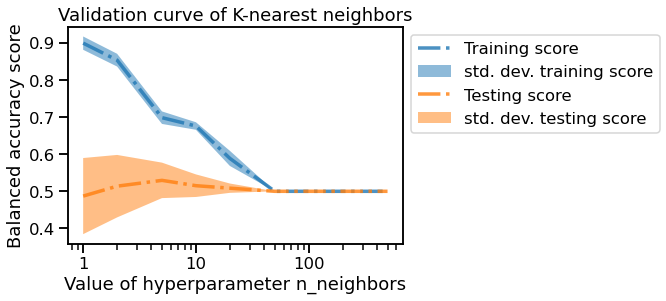

In [37]:
from sklearn.model_selection import validation_curve
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
param_name = "n_neighbors"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=param_range, cv=5,
    n_jobs=2, scoring="balanced_accuracy")

_, ax = plt.subplots()
for name, scores in zip(
    ["Training score", "Testing score"], [train_scores, test_scores]
):
    ax.plot(
        param_range, scores.mean(axis=1), linestyle="-.", label=name,
        alpha=0.8)
    ax.fill_between(
        param_range, scores.mean(axis=1) - scores.std(axis=1),
        scores.mean(axis=1) + scores.std(axis=1),
        alpha=0.5, label=f"std. dev. {name.lower()}")

ax.set_xticks(param_range)
ax.set_xscale("log")
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel("Value of hyperparameter n_neighbors")
ax.set_ylabel("Balanced accuracy score")
ax.set_title("Validation curve of K-nearest neighbors")
_ = ax.legend(bbox_to_anchor=(1., 1.))